In [14]:
import pandas as pd

# ডেটাসেট লোড করুন
df = pd.read_csv('/kaggle/input/global-sales-performance-dataset/large_sales_data.csv')


print(df.head())



  Region Salesperson  Revenue  Profit  Units_Sold  Customer_Satisfaction  \
0   East       Alice   137118   10067         219                   4.06   
1   West       Alice    78577   38481         750                   2.64   
2  North       Alice    19078   28037         406                   3.62   
3   East         Eve   166075   10557         109                   2.04   
4   East       David    72768   10435          40                   1.64   

   Marketing_Spend  Discount_Percentage Product_Category Sales_Channel  \
0            14666                13.40        Furniture        Retail   
1             8254                 3.70       Automobile     Wholesale   
2            14746                 6.18        Furniture        Retail   
3             4578                 0.03        Furniture        Online   
4            13353                 1.18      Electronics     Wholesale   

   Order_Processing_Time  
0                      1  
1                      3  
2                

## Mean, Median, and Standard Deviation

In [3]:
# Compute statistics for Revenue, Profit, and Units_Sold
stats = df[['Revenue', 'Profit', 'Units_Sold']].describe()
print(round (stats))

        Revenue   Profit  Units_Sold
count    1000.0   1000.0      1000.0
mean   107316.0  23973.0       499.0
std     55015.0  14067.0       282.0
min     10163.0   1097.0        10.0
25%     58298.0  11634.0       256.0
50%    108841.0  23020.0       502.0
75%    155578.0  35622.0       738.0
max    199784.0  49980.0       999.0


## Correlation Between Marketing Spend & Revenue
Correlation measures the relationship between two variables. Its value ranges from -1 to +1:

        
* +1: Perfect positive correlation (as one variable increases, the other also increases).
* -1: Perfect negative correlation (as one variable increases, the other decreases).        0: No correlation.

In [4]:
corr = df['Revenue'].corr(df['Marketing_Spend'])
print('Correlation between Marketing Spend and Revenue is : ',round (corr, 3))

Correlation between Marketing Spend and Revenue is :  -0.015


### Result:
The correlation between Marketing Spend and Revenue is **-0.015**, indicating almost no relationship.

## Most Common Sales Channel

In [5]:
most_common_channel = df['Sales_Channel'].value_counts().idxmax()
print("Most common sales channel:", most_common_channel)

Most common sales channel: Online


## Probability & Sampling

In [6]:
sample = df.sample(n=50, random_state=42)
print(sample[['Revenue', 'Profit']].mean())

#Probability: Customer Satisfaction > 4.5
prob_high_satisfaction = (df['Customer_Satisfaction'] > 4.5).mean()
print("P(Customer Satisfaction > 4.5):", prob_high_satisfaction)

#Probability: Discount Percentage > 20%
prob_high_discount = (df['Discount_Percentage'] > 20).mean()
print("P(Discount > 20%):", prob_high_discount)


Revenue    120123.40
Profit      22881.02
dtype: float64
P(Customer Satisfaction > 4.5): 0.111
P(Discount > 20%): 0.326


## Histogram of Revenue

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


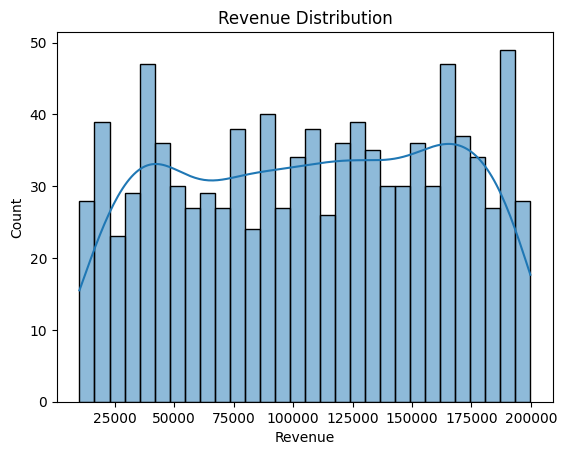

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Revenue'], bins=30, kde=True)
plt.title("Revenue Distribution")
plt.show()


## Boxplot for Customer Satisfaction

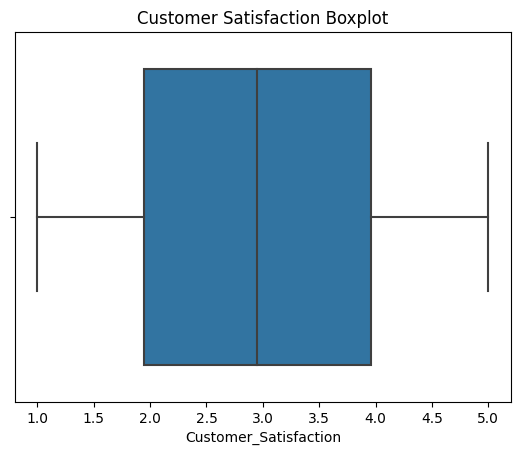

In [8]:
sns.boxplot(x=df['Customer_Satisfaction'])
plt.title("Customer Satisfaction Boxplot")
plt.show()


## Check for Normal Distribution (Q-Q Plot)

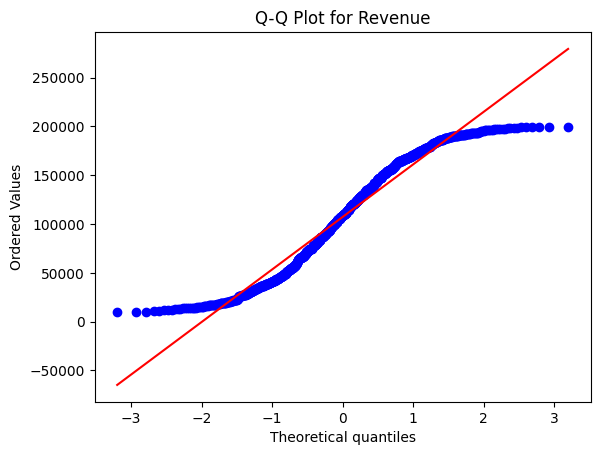

In [9]:
import scipy.stats as stats

stats.probplot(df['Revenue'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Revenue")
plt.show()


## T-Test: Revenue of Online vs. Retai

In [10]:
from scipy.stats import ttest_ind

online_revenue = df[df['Sales_Channel'] == 'Online']['Revenue']
retail_revenue = df[df['Sales_Channel'] == 'Retail']['Revenue']

t_stat, p_value = ttest_ind(online_revenue, retail_revenue)
print("T-Test Results: t-statistic =", t_stat, "p-value =", p_value)


T-Test Results: t-statistic = -1.3116001100506178 p-value = 0.19010102763836595


### Result


*     t-statistic = -1.31: The Online group has slightly lower revenue than the Retail group.
* p-value = 0.190: The difference is not statistically significant (p > 0.05).
* Conclusion: No significant difference in revenue between Online and Retail groups.


## Chi-Square Test: Product Category vs. Sales Channel

In [11]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Product_Category'], df['Sales_Channel'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Test Results: chi2 =", chi2, "p-value =", p)


Chi-Square Test Results: chi2 = 16.07647748431053 p-value = 0.04129847328338135


### Result
    chi2 = 16.076: This is the Chi-Square statistic, which measures the difference between observed and expected frequencies in the contingency table.

    p-value = 0.041: This indicates the probability of observing the data if there is no association between Product Category and Sales Channel.

## Confidence Intervals

In [12]:
import scipy.stats as stats

mean_marketing_spend = df['Marketing_Spend'].mean()
sem_marketing_spend = stats.sem(df['Marketing_Spend'])
confidence_interval = stats.t.interval(0.95, len(df['Marketing_Spend'])-1, loc=mean_marketing_spend, scale=sem_marketing_spend)
print(f"95% Confidence Interval for Marketing Spend: {confidence_interval}")

95% Confidence Interval for Marketing Spend: (9830.518514877127, 10531.515485122873)



## Regression Analysis

In [13]:
import statsmodels.api as sm

X = df['Revenue']
y = df['Profit']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6693
Date:                Wed, 05 Mar 2025   Prob (F-statistic):              0.413
Time:                        19:21:08   Log-Likelihood:                -10970.
No. Observations:                1000   AIC:                         2.194e+04
Df Residuals:                     998   BIC:                         2.195e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.468e+04    975.670     25.299      0.0

## ANOVA Test

In [16]:
from scipy.stats import f_oneway

channels = df['Sales_Channel'].unique()
revenue_by_channel = [df[df['Sales_Channel'] == channel]['Revenue'] for channel in channels]

f_stat, p_value = f_oneway(*revenue_by_channel)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 1.164443946182709, P-value: 0.31252023789469413


    
* Since the p-value (0.313) is greater than 0.05, we fail to reject the null hypothesis.
* Conclusion: There are no statistically significant differences in Revenue across different Sales Channels.
